In [1]:
# Load the packages
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
import sys
import csv
import math
import keras
import argparse
import scipy.io
import sklearn
import sklearn.datasets
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/affine/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras.regularizers import L1L2
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.optimizers import SGD

In [3]:
#Load dataset
master_data= pd.read_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/tgs-data-science-master-c3f8b3a2900f40ddde655f8ef5f17d00cfaa7033/data/Master_dataset_v1.csv')

/home/affine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,20,23,25,34,48,65,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Columns in dataset
master_data.columns

Index(['Unnamed: 0', 'WellId', 'LeaseId', 'GroupId', 'API', 'FieldName_x',
       'Well Name and Number', 'WellNumber_x', 'OperatorName_x', 'StateName_x',
       'County_x', 'ProductionMonthYear', 'DaysOnProduction', 'Gas', 'Oil',
       'Water', 'ProductionType', 'ProductionTypeName', 'WellsReported',
       'AllocationMethod', 'DisplayFormation_x', 'StateLeaseId', 'WellName',
       'WellNumber_y', 'BasinName', 'DisplayFormation_y', 'Township',
       'TownshipDirection', 'Range', 'RangeDirection', 'Section', 'District',
       'Abstract', 'Survey', 'Block', 'Offshore', 'Area', 'OffshoreBlock',
       'QuarterQuarter', 'FootageNS', 'DirectionNS', 'FootageEW',
       'DirectionEW', 'SurfaceLatitude', 'SurfaceLongitude', 'BottomLatitude',
       'BottomLongitude', 'SpudDate', 'PlugDate', 'CompletionDate',
       'FirstProductionDate', 'FirstMonth', 'HasProduction', 'WellType',
       'TotalVerticalDepth', 'MeasuredDepth', 'ElevationGround',
       'ElevationKellyBushing', 'ElevationWat

In [10]:
#selecting Operator 'Occidental W TX OVERTHRUST INC.'
master_data1=master_data[master_data.OperatorName_x=="OCCIDENTAL W TX OVERTHRUST INC."]
#master_data1.head()

In [11]:
#select required API
master_data1=master_data1[master_data1.API==42371383490000]#42371381890000]#42371380040000]#42371381890000]#42371381890000]#42371378930000]
labels=['Oil','ProductionMonthYear1','YearMonth']
master_data1=master_data1[labels]

#Sort data based on YearMonth
master_data1=master_data1.sort_values(by=['YearMonth'])#, ascending=[1, 1],axis=1)
#master_data1.tail()

In [12]:
master_data2=master_data1
master_data2=pd.DataFrame(master_data2)
# master_data2['start_date']=datetime.strptime(master_data1['ProductionMonthYear1'].iloc[0], "%Y-%m-%d")
# print(type(pd.DataFrame(master_data2['start_date']).iloc[0,0]))
# print(type(pd.DataFrame(master_data2['ProductionMonthYear1']).iloc[0,0]))

In [13]:
# master_data2['ProductionMonthYear1']=master_data2['ProductionMonthYear1'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# master_data2['days_age']=master_data2['ProductionMonthYear1'].sub(master_data2['start_date'])
# master_data2['days_age']=master_data2['days_age']/np.timedelta64(1,'D')

In [14]:
#Set YearMonth as Index for production
master_data2=master_data2[['YearMonth','Oil']]#,'days_age']]
master_data2=master_data2.iloc[:-1,:]# removing 201708 & 201709 values as they were zeros
master_data2.set_index('YearMonth')

,Oil
YearMonth,
200810,0.0
200811,0.0
200812,0.0
200901,107.0
200902,10.0
200903,0.0
200904,0.0
200905,0.0
200906,128.0


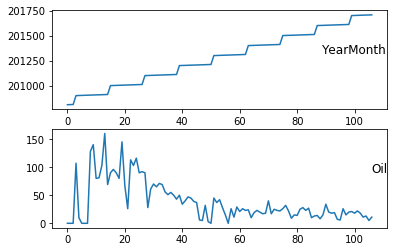

In [15]:
from matplotlib import pyplot
# load dataset
dataset = master_data2
values = dataset.values

# specify columns to plot
groups = [0,1]#,2]#3,4]#,5,6,7,8,9,10]
i = 0
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i+1)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [16]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [17]:
#Define lag(time steps for training) and n_seq(number of time steps to be predicted in future)
n_seq = 12
n_feature=1
n_lag= 18


In [18]:
# load dataset
dataset = master_data2.iloc[:,1:]
values = dataset.values
print(values.shape)
# ensure all data is float
values = values.astype('float32')
#print(values)

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, n_seq)

# drop columns we don't want to predict
# reframed.drop(reframed.iloc[:,25:], axis=1, inplace=True)
print(reframed.head())
print(reframed.shape)

(107, 1)
    var1(t-18)  var1(t-17)  var1(t-16)  var1(t-15)  var1(t-14)  var1(t-13)  \
18     0.00000     0.00000     0.00000     0.66875      0.0625       0.000   
19     0.00000     0.00000     0.66875     0.06250      0.0000       0.000   
20     0.00000     0.66875     0.06250     0.00000      0.0000       0.000   
21     0.66875     0.06250     0.00000     0.00000      0.0000       0.800   
22     0.06250     0.00000     0.00000     0.00000      0.8000       0.875   

    var1(t-12)  var1(t-11)  var1(t-10)  var1(t-9)     ...      var1(t+2)  \
18       0.000     0.00000     0.80000    0.87500     ...        0.41875   
19       0.000     0.80000     0.87500    0.50000     ...        0.16250   
20       0.800     0.87500     0.50000    0.50625     ...        0.70625   
21       0.875     0.50000     0.50625    0.64375     ...        0.64375   
22       0.500     0.50625     0.64375    1.00000     ...        0.72500   

    var1(t+3)  var1(t+4)  var1(t+5)  var1(t+6)  var1(t+7)  var1(t

In [33]:
# split into train and test sets
values = reframed.values
train = values[:-1, :]
test = values[-1:, :]

# split into input and outputs
train_X, train_y = train[12:, :-(n_seq)], train[12:, -(n_seq):]
test_X, test_y = test[:, :-n_seq], test[:, -n_seq:]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_feature))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_feature))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(65, 18, 1) (65, 12) (1, 18, 1) (1, 12)


In [63]:
#Hyperparameters
h1=n_lag*2
h2=n_lag*2
h3=n_seq*2
h4=n_seq
drop1=0.3
drop2=0.2
drop3=0.1 
drop4=0.1
n_y=n_seq
epoch=1000
batch_size=8
lr=0.001
L1=0.00
L2=0.06

In [64]:
# model.add(LSTM(h1, batch_input_shape=(batch_size,train_X.shape[1],train_X.shape[2]), stateful=True))#,return_sequences=True, recurrent_regularizer=reg))

In [65]:
# design network
model = Sequential()
reg = L1L2(l1=L1, l2=L2)
model.add(LSTM(h1, input_shape=(train_X.shape[1],train_X.shape[2]),return_sequences=True, recurrent_regularizer=reg))
model.add(Dropout(drop1, seed = 1))
model.add(LSTM(h2,return_sequences=True))
model.add(Dropout(drop2, seed = 1))
model.add(LSTM(h3,return_sequences=True))
model.add(Dropout(drop3, seed = 1))
model.add(LSTM(h4,return_sequences=False))
model.add(Dropout(drop4, seed = 1))
model.add(Dense(n_seq, activation='relu'))
model.add(Dense(n_y, activation='relu'))
adam = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mae', optimizer= adam)



In [66]:
# model=load_model('LSTM_12_month.h5')
# weights=model.get_weights()
# print(weights)
# model.save_weights('weights.hdf5')
# model.set_weights(weights)
# model.load_weights('weights.hdf5')
# model.load_weights('weights_42371381890000.hdf5')

Train on 65 samples, validate on 1 samples
Epoch 1/1000
 - 3s - loss: 2.1508 - val_loss: 1.8727
Epoch 2/1000
 - 0s - loss: 1.8020 - val_loss: 1.5737
Epoch 3/1000
 - 0s - loss: 1.5141 - val_loss: 1.3158
Epoch 4/1000
 - 0s - loss: 1.2812 - val_loss: 1.1088
Epoch 5/1000
 - 0s - loss: 1.0831 - val_loss: 0.9370
Epoch 6/1000
 - 0s - loss: 0.9198 - val_loss: 0.7933
Epoch 7/1000
 - 0s - loss: 0.7838 - val_loss: 0.6753
Epoch 8/1000
 - 0s - loss: 0.6704 - val_loss: 0.5786
Epoch 9/1000
 - 0s - loss: 0.5775 - val_loss: 0.4950
Epoch 10/1000
 - 0s - loss: 0.4991 - val_loss: 0.4260
Epoch 11/1000
 - 0s - loss: 0.4326 - val_loss: 0.3664
Epoch 12/1000
 - 0s - loss: 0.3762 - val_loss: 0.3126
Epoch 13/1000
 - 0s - loss: 0.3283 - val_loss: 0.2708
Epoch 14/1000
 - 0s - loss: 0.2865 - val_loss: 0.2379
Epoch 15/1000
 - 0s - loss: 0.2563 - val_loss: 0.2091
Epoch 16/1000
 - 1s - loss: 0.2257 - val_loss: 0.1846
Epoch 17/1000
 - 1s - loss: 0.2039 - val_loss: 0.1645
Epoch 18/1000
 - 1s - loss: 0.1846 - val_loss: 0

 - 0s - loss: 0.0581 - val_loss: 0.0464
Epoch 152/1000
 - 0s - loss: 0.0581 - val_loss: 0.0449
Epoch 153/1000
 - 0s - loss: 0.0585 - val_loss: 0.0454
Epoch 154/1000
 - 0s - loss: 0.0561 - val_loss: 0.0462
Epoch 155/1000
 - 0s - loss: 0.0563 - val_loss: 0.0458
Epoch 156/1000
 - 0s - loss: 0.0572 - val_loss: 0.0456
Epoch 157/1000
 - 0s - loss: 0.0566 - val_loss: 0.0462
Epoch 158/1000
 - 0s - loss: 0.0564 - val_loss: 0.0456
Epoch 159/1000
 - 0s - loss: 0.0574 - val_loss: 0.0451
Epoch 160/1000
 - 0s - loss: 0.0564 - val_loss: 0.0447
Epoch 161/1000
 - 0s - loss: 0.0585 - val_loss: 0.0456
Epoch 162/1000
 - 0s - loss: 0.0570 - val_loss: 0.0455
Epoch 163/1000
 - 0s - loss: 0.0586 - val_loss: 0.0466
Epoch 164/1000
 - 0s - loss: 0.0569 - val_loss: 0.0449
Epoch 165/1000
 - 0s - loss: 0.0570 - val_loss: 0.0449
Epoch 166/1000
 - 0s - loss: 0.0573 - val_loss: 0.0457
Epoch 167/1000
 - 0s - loss: 0.0570 - val_loss: 0.0457
Epoch 168/1000
 - 1s - loss: 0.0563 - val_loss: 0.0460
Epoch 169/1000
 - 1s - lo

 - 0s - loss: 0.0561 - val_loss: 0.0454
Epoch 301/1000
 - 0s - loss: 0.0565 - val_loss: 0.0455
Epoch 302/1000
 - 0s - loss: 0.0565 - val_loss: 0.0459
Epoch 303/1000
 - 0s - loss: 0.0558 - val_loss: 0.0449
Epoch 304/1000
 - 0s - loss: 0.0561 - val_loss: 0.0453
Epoch 305/1000
 - 0s - loss: 0.0561 - val_loss: 0.0442
Epoch 306/1000
 - 0s - loss: 0.0558 - val_loss: 0.0451
Epoch 307/1000
 - 0s - loss: 0.0561 - val_loss: 0.0448
Epoch 308/1000
 - 0s - loss: 0.0564 - val_loss: 0.0453
Epoch 309/1000
 - 0s - loss: 0.0561 - val_loss: 0.0452
Epoch 310/1000
 - 0s - loss: 0.0564 - val_loss: 0.0449
Epoch 311/1000
 - 0s - loss: 0.0563 - val_loss: 0.0451
Epoch 312/1000
 - 0s - loss: 0.0604 - val_loss: 0.0464
Epoch 313/1000
 - 0s - loss: 0.0570 - val_loss: 0.0453
Epoch 314/1000
 - 0s - loss: 0.0585 - val_loss: 0.0449
Epoch 315/1000
 - 0s - loss: 0.0579 - val_loss: 0.0457
Epoch 316/1000
 - 0s - loss: 0.0554 - val_loss: 0.0456
Epoch 317/1000
 - 0s - loss: 0.0565 - val_loss: 0.0453
Epoch 318/1000
 - 0s - lo

 - 0s - loss: 0.0567 - val_loss: 0.0458
Epoch 450/1000
 - 0s - loss: 0.0561 - val_loss: 0.0458
Epoch 451/1000
 - 0s - loss: 0.0558 - val_loss: 0.0456
Epoch 452/1000
 - 0s - loss: 0.0571 - val_loss: 0.0454
Epoch 453/1000
 - 0s - loss: 0.0569 - val_loss: 0.0460
Epoch 454/1000
 - 0s - loss: 0.0569 - val_loss: 0.0456
Epoch 455/1000
 - 0s - loss: 0.0560 - val_loss: 0.0455
Epoch 456/1000
 - 0s - loss: 0.0565 - val_loss: 0.0453
Epoch 457/1000
 - 0s - loss: 0.0568 - val_loss: 0.0464
Epoch 458/1000
 - 0s - loss: 0.0567 - val_loss: 0.0457
Epoch 459/1000
 - 0s - loss: 0.0560 - val_loss: 0.0449
Epoch 460/1000
 - 0s - loss: 0.0559 - val_loss: 0.0452
Epoch 461/1000
 - 0s - loss: 0.0560 - val_loss: 0.0455
Epoch 462/1000
 - 0s - loss: 0.0559 - val_loss: 0.0449
Epoch 463/1000
 - 0s - loss: 0.0570 - val_loss: 0.0452
Epoch 464/1000
 - 0s - loss: 0.0568 - val_loss: 0.0446
Epoch 465/1000
 - 0s - loss: 0.0565 - val_loss: 0.0450
Epoch 466/1000
 - 0s - loss: 0.0564 - val_loss: 0.0456
Epoch 467/1000
 - 0s - lo

 - 0s - loss: 0.0556 - val_loss: 0.0462
Epoch 599/1000
 - 0s - loss: 0.0559 - val_loss: 0.0443
Epoch 600/1000
 - 0s - loss: 0.0565 - val_loss: 0.0432
Epoch 601/1000
 - 0s - loss: 0.0560 - val_loss: 0.0430
Epoch 602/1000
 - 0s - loss: 0.0559 - val_loss: 0.0436
Epoch 603/1000
 - 0s - loss: 0.0550 - val_loss: 0.0442
Epoch 604/1000
 - 0s - loss: 0.0553 - val_loss: 0.0442
Epoch 605/1000
 - 0s - loss: 0.0558 - val_loss: 0.0450
Epoch 606/1000
 - 0s - loss: 0.0559 - val_loss: 0.0447
Epoch 607/1000
 - 0s - loss: 0.0555 - val_loss: 0.0433
Epoch 608/1000
 - 0s - loss: 0.0559 - val_loss: 0.0428
Epoch 609/1000
 - 0s - loss: 0.0553 - val_loss: 0.0431
Epoch 610/1000
 - 0s - loss: 0.0549 - val_loss: 0.0449
Epoch 611/1000
 - 0s - loss: 0.0554 - val_loss: 0.0447
Epoch 612/1000
 - 0s - loss: 0.0559 - val_loss: 0.0438
Epoch 613/1000
 - 0s - loss: 0.0550 - val_loss: 0.0443
Epoch 614/1000
 - 0s - loss: 0.0549 - val_loss: 0.0433
Epoch 615/1000
 - 0s - loss: 0.0552 - val_loss: 0.0435
Epoch 616/1000
 - 0s - lo

 - 0s - loss: 0.0535 - val_loss: 0.0437
Epoch 748/1000
 - 0s - loss: 0.0538 - val_loss: 0.0429
Epoch 749/1000
 - 0s - loss: 0.0533 - val_loss: 0.0427
Epoch 750/1000
 - 0s - loss: 0.0523 - val_loss: 0.0432
Epoch 751/1000
 - 0s - loss: 0.0525 - val_loss: 0.0432
Epoch 752/1000
 - 0s - loss: 0.0526 - val_loss: 0.0430
Epoch 753/1000
 - 0s - loss: 0.0529 - val_loss: 0.0443
Epoch 754/1000
 - 0s - loss: 0.0527 - val_loss: 0.0440
Epoch 755/1000
 - 0s - loss: 0.0526 - val_loss: 0.0432
Epoch 756/1000
 - 0s - loss: 0.0536 - val_loss: 0.0430
Epoch 757/1000
 - 1s - loss: 0.0538 - val_loss: 0.0425
Epoch 758/1000
 - 0s - loss: 0.0530 - val_loss: 0.0423
Epoch 759/1000
 - 0s - loss: 0.0522 - val_loss: 0.0425
Epoch 760/1000
 - 0s - loss: 0.0526 - val_loss: 0.0431
Epoch 761/1000
 - 0s - loss: 0.0522 - val_loss: 0.0430
Epoch 762/1000
 - 0s - loss: 0.0538 - val_loss: 0.0425
Epoch 763/1000
 - 0s - loss: 0.0531 - val_loss: 0.0430
Epoch 764/1000
 - 0s - loss: 0.0527 - val_loss: 0.0426
Epoch 765/1000
 - 0s - lo

 - 0s - loss: 0.0427 - val_loss: 0.0328
Epoch 897/1000
 - 0s - loss: 0.0424 - val_loss: 0.0333
Epoch 898/1000
 - 0s - loss: 0.0438 - val_loss: 0.0336
Epoch 899/1000
 - 0s - loss: 0.0435 - val_loss: 0.0325
Epoch 900/1000
 - 0s - loss: 0.0426 - val_loss: 0.0324
Epoch 901/1000
 - 0s - loss: 0.0417 - val_loss: 0.0329
Epoch 902/1000
 - 0s - loss: 0.0416 - val_loss: 0.0331
Epoch 903/1000
 - 0s - loss: 0.0426 - val_loss: 0.0326
Epoch 904/1000
 - 0s - loss: 0.0425 - val_loss: 0.0323
Epoch 905/1000
 - 0s - loss: 0.0439 - val_loss: 0.0323
Epoch 906/1000
 - 0s - loss: 0.0434 - val_loss: 0.0330
Epoch 907/1000
 - 0s - loss: 0.0430 - val_loss: 0.0323
Epoch 908/1000
 - 0s - loss: 0.0428 - val_loss: 0.0319
Epoch 909/1000
 - 0s - loss: 0.0433 - val_loss: 0.0327
Epoch 910/1000
 - 0s - loss: 0.0442 - val_loss: 0.0324
Epoch 911/1000
 - 0s - loss: 0.0414 - val_loss: 0.0322
Epoch 912/1000
 - 0s - loss: 0.0441 - val_loss: 0.0316
Epoch 913/1000
 - 0s - loss: 0.0409 - val_loss: 0.0320
Epoch 914/1000
 - 0s - lo

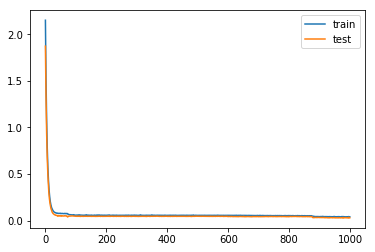

In [67]:
# fit network
history = model.fit(train_X, train_y, epochs = epoch, batch_size = batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# model.save('LSTM_12_month_42371381890000.h5')
# del model

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [68]:
#SAVE THE MODEL

model.save('LSTM_12_month_42371383490000_v2.h5')
# model=load_model('LSTM_12_month_42371380040000.h5')
# weights=model.get_weights()
# print(weights)
model.save_weights('weights_42371383490000_v2.hdf5')
# model.set_weights(weights)
# weights=model.load_weights('weights_42371380040000.hdf5')
# model.set_weights(weights)

In [69]:
#Predict the model on test
yhat = model.predict(test_X)
# print(yhat.shape)
# print(test_y.shape)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# print(inv_yhat.shape)
inv_yhat = inv_yhat[:,:]

# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)
inv_y = inv_y[:,:]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

#def mean_absolute_error(y_true, y_pred):
MAE = mean_absolute_error(inv_y, inv_yhat)
print("MAE = "+str(MAE))

Test RMSE: 6.245
MAE = 4.66099


In [70]:
# make a prediction on train
yhat_train = model.predict(train_X)

# invert scaling for train forecast
inv_yhat_train = scaler.inverse_transform(yhat_train)

# invert scaling for actual train
inv_y_train = scaler.inverse_transform(train_y)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('Train RMSE: %.3f' % rmse)

#def mean_absolute_error(y_true, y_pred):
MAE_train = mean_absolute_error(inv_y_train, inv_yhat_train)
print("MAE Train = "+str(MAE_train))

Train RMSE: 8.269
MAE Train = 5.88281


In [71]:
# Calculate Mape
# Note LSTM always gives 1 step shifted reponse

#test Mape
Mape_test1=[]
for i in range(n_seq-1):
    mape1=(np.abs(inv_y[:,i]-inv_yhat[:,i+1])/(inv_y[:,i]+1))
    Mape_test1.append(mape1)
#print(Mape_test1)
Mape_test=np.mean(Mape_test1)

#Mape_test=np.mean(np.abs(inv_y[i]-inv_yhat[i+1])/(inv_y[i]+1))
#Mape_train=np.mean(np.abs(inv_y_train[i]-inv_yhat_train[i+1])/(inv_y_train[i]+1))
Mape_train=np.mean(np.abs(inv_y_train-inv_yhat_train)/(inv_y_train+1))

print("MAPE Train = "+str(Mape_train))
print("MAPE Test = "+str(Mape_test))

MAPE Train = 0.728135
MAPE Test = 0.221872


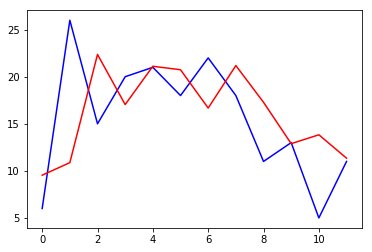

In [72]:
df1=pd.DataFrame(inv_y)
df2=pd.DataFrame(inv_yhat)
value1=df1.values
value2=df2.values
value1=value1.reshape(n_seq,1)
value2=value2.reshape(n_seq,1)
plt.figure()
plt.plot(value1,'b')
plt.plot(value2,'r')
plt.show()

In [44]:
# df1=pd.DataFrame(inv_y_train[0,:])
# df2=pd.DataFrame(inv_yhat_train[0,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

# df1=pd.DataFrame(inv_y_train[20,:])
# df2=pd.DataFrame(inv_yhat_train[20,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

# df1=pd.DataFrame(inv_y_train[40,:])
# df2=pd.DataFrame(inv_yhat_train[40,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

In [45]:
for i in range(len(inv_y)):
    for j in range(len(inv_y[i])):
        print(str(inv_y[i][j])+", "+str(inv_yhat[i][j]))

6.0, 13.1481
26.0, 16.5124
15.0, 24.953
20.0, 16.8437
21.0, 20.3112
18.0, 21.8353
22.0, 17.0043
18.0, 20.9641
11.0, 16.3748
13.0, 12.9495
5.0, 14.0593
11.0, 9.35072


In [47]:
# get test results in CSV
df1=pd.DataFrame(inv_y[:,:-1])
df1=pd.DataFrame.transpose(df1)
df2=pd.DataFrame(inv_yhat[:,1:])
df2=pd.DataFrame.transpose(df2)
df3=pd.DataFrame(np.array(master_data2.iloc[-n_seq:-1,:]))
df3.columns=['YearMonth','Oil']
df4=pd.concat([df3,df1,df2],axis=1)
df4.columns=['YearMonth','Oil','Oil_Actual','Oil_Predicted']
print(df4)

    YearMonth   Oil  Oil_Actual  Oil_Predicted
0    201609.0   6.0    6.000000      16.512430
1    201610.0  26.0   26.000002      24.952988
2    201611.0  15.0   15.000000      16.843731
3    201612.0  20.0   20.000000      20.311178
4    201701.0  21.0   21.000002      21.835337
5    201702.0  18.0   18.000000      17.004261
6    201703.0  22.0   22.000000      20.964050
7    201704.0  18.0   18.000000      16.374750
8    201705.0  11.0   11.000000      12.949542
9    201706.0  13.0   13.000001      14.059267
10   201707.0   5.0    5.000000       9.350716


In [48]:
df4.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/API_42371383490000_prediction.csv')

In [51]:
df1=pd.DataFrame(inv_y_train)
df11=df1.iloc[:,0]

df2=pd.DataFrame(inv_yhat_train)
df12=df2.iloc[:,0]

df3=pd.DataFrame(np.array(master_data2.iloc[18+12:-n_seq,:]))
print(df3.shape)
df3.columns=['YearMonth','Oil']

df_train=pd.concat([df3,df11,df12], axis=1)
df_train1=pd.DataFrame(np.array(df_train))
df_train1.columns=["Year-Month","Oil","Actual_Oil","Predicted_Oil"]
df_train1

(65, 2)


,Year-Month,Oil,Actual_Oil,Predicted_Oil
0,201104.0,70.0,70.000000,66.637741
1,201105.0,65.0,65.000000,64.868294
2,201106.0,71.0,71.000000,63.447594
3,201107.0,69.0,69.000000,59.963264
4,201108.0,56.0,56.000000,54.828442
5,201109.0,51.0,51.000000,50.677650
6,201110.0,55.0,55.000000,49.517349
7,201111.0,50.0,50.000000,46.709961
8,201112.0,43.0,43.000000,38.515247
9,201201.0,50.0,50.000000,33.183018


In [52]:
df_train1.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/API_42371383490000_train_prediction.csv')